In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Load the dataset
df = pd.read_csv("/content/loan_data.csv")
df.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1


In [12]:
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [13]:
#Simple cleaning
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

In [14]:
#Overall approval rate
print("Overall Approval Rate:", df['loan_status'].mean())

Overall Approval Rate: 0.2222222222222222


In [15]:
#Approval rate by categorical columns
print("\nApproval by Gender:\n", df.groupby('person_gender')['loan_status'].mean())
print("\nApproval by Education:\n", df.groupby('person_education')['loan_status'].mean())
print("\nApproval by Home Ownership:\n", df.groupby('person_home_ownership')['loan_status'].mean())
print("\nApproval by Loan Intent:\n", df.groupby('loan_intent')['loan_status'].mean())


Approval by Gender:
 person_gender
female    0.222481
male      0.222012
Name: loan_status, dtype: float64

Approval by Education:
 person_education
Associate      0.220319
Bachelor       0.225241
Doctorate      0.228663
High School    0.223104
Master         0.217622
Name: loan_status, dtype: float64

Approval by Home Ownership:
 person_home_ownership
MORTGAGE    0.115961
OTHER       0.333333
OWN         0.075229
RENT        0.323977
Name: loan_status, dtype: float64

Approval by Loan Intent:
 loan_intent
DEBTCONSOLIDATION    0.302729
EDUCATION            0.169562
HOMEIMPROVEMENT      0.263015
MEDICAL              0.278194
PERSONAL             0.201404
VENTURE              0.144264
Name: loan_status, dtype: float64


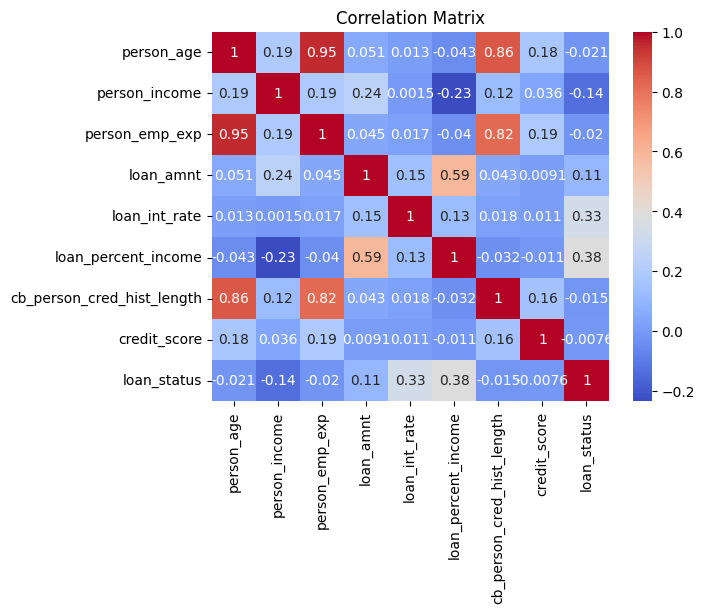

In [16]:
#Correlation Matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

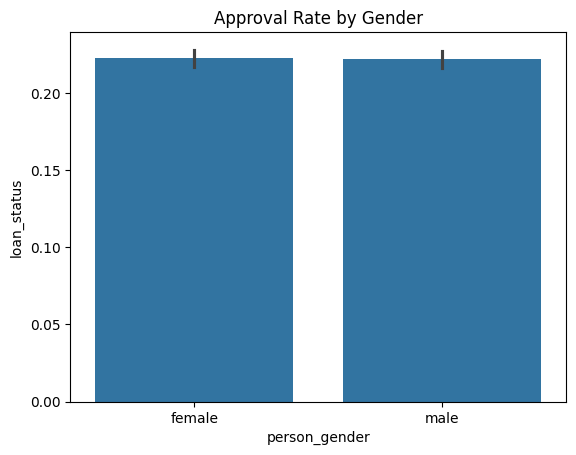

In [17]:
sns.barplot(x='person_gender', y='loan_status', data=df)
plt.title("Approval Rate by Gender")
plt.show()

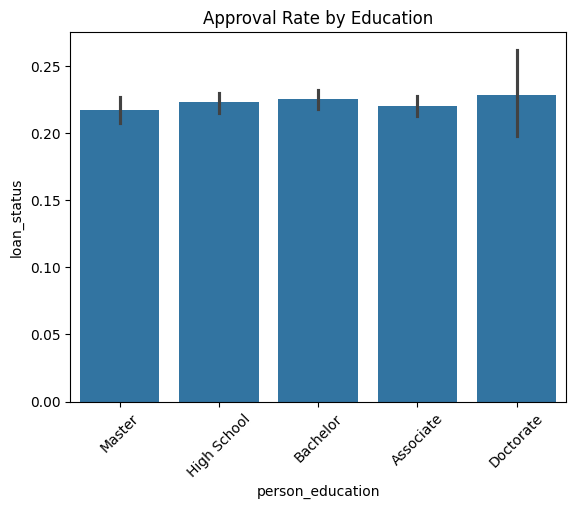

In [18]:
sns.barplot(x='person_education', y='loan_status', data=df)
plt.title("Approval Rate by Education")
plt.xticks(rotation=45)
plt.show()